## A. TensorFlow

In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

2024-09-09 09:46:20.548383: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Step 1. Import the data from the given .csv file (diabetes.csv Download diabetes.csv). The first few columns contain the data while the last column is a binary class label of 0 or 1

In [9]:
# Load the data
data = pd.read_csv('diabetes.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

Step 2. Preprocess the data as you see fit and show basic data visualization for better understanding of data

In [10]:
data_info = data.info()
data_head = data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  759 non-null    float64
 1   Feature2  759 non-null    float64
 2   Feature3  759 non-null    float64
 3   Feature4  759 non-null    float64
 4   Feature5  759 non-null    float64
 5   Feature6  759 non-null    float64
 6   Feature7  759 non-null    float64
 7   Feature8  759 non-null    float64
 8   Feature9  759 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 53.5 KB


In [14]:
# Basic statistics
print(data.describe())

         Feature1    Feature2    Feature3    Feature4    Feature5    Feature6  \
count  759.000000  759.000000  759.000000  759.000000  759.000000  759.000000   
mean    -0.407657    0.218563    0.176505   -0.289735   -0.323534   -0.032245   
std      0.386260    0.306419    0.201287    0.258480    0.375544    0.205376   
min     -0.882353   -0.557789   -0.606557   -0.858586   -0.966903   -0.457526   
25%     -0.764706   -0.005025    0.016393   -0.494949   -0.716312   -0.178837   
50%     -0.529412    0.165829    0.180328   -0.292929    0.000000   -0.034277   
75%      0.000000    0.407035    0.311475    0.000000    0.000000    0.087929   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         Feature7    Feature8    Feature9  
count  759.000000  759.000000  759.000000  
mean    -0.663253   -0.516162    0.653491  
std      0.283056    0.400794    0.476171  
min     -0.994876   -0.966667    0.000000  
25%     -0.858241   -0.866667    0.000000  
50%   

<Figure size 1200x1000 with 0 Axes>

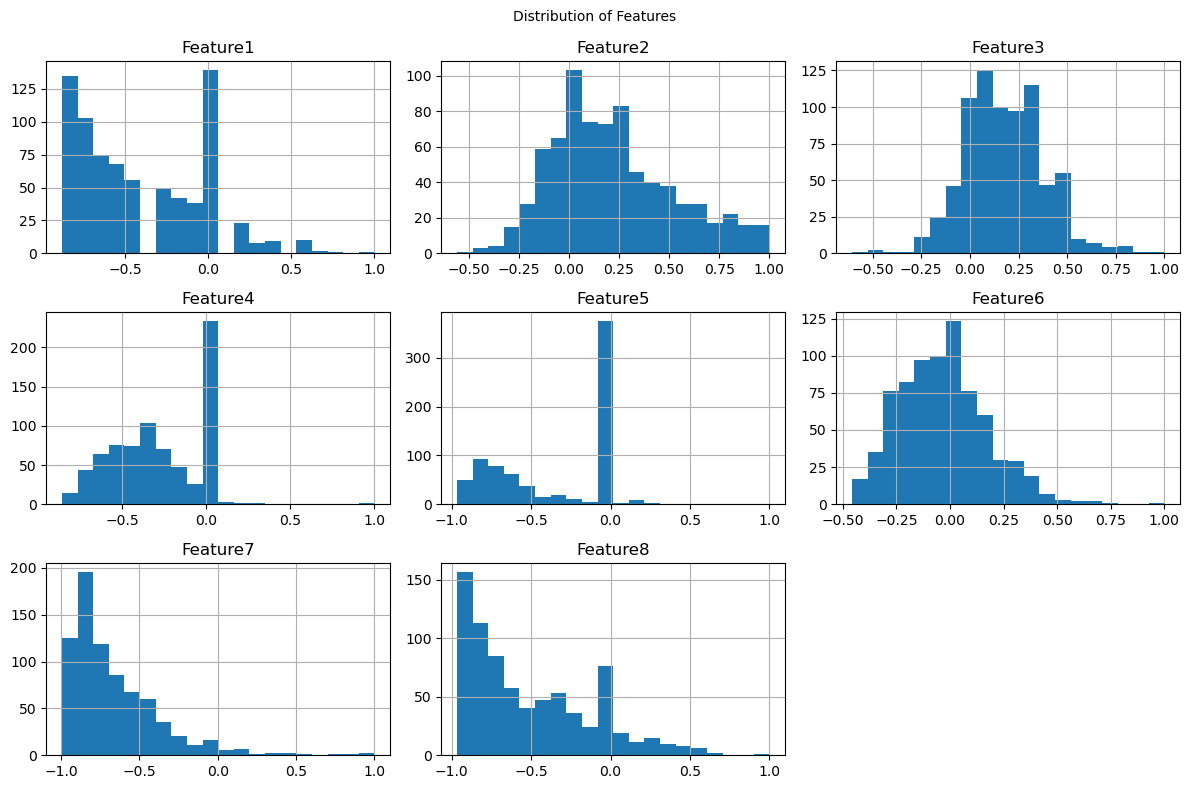

In [18]:
# Visualizing the distribution of each feature
plt.figure(figsize=(12, 10))
data.iloc[:, :-1].hist(bins=20, figsize=(12, 8))
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.suptitle('Distribution of Features', fontsize=10)
plt.show()

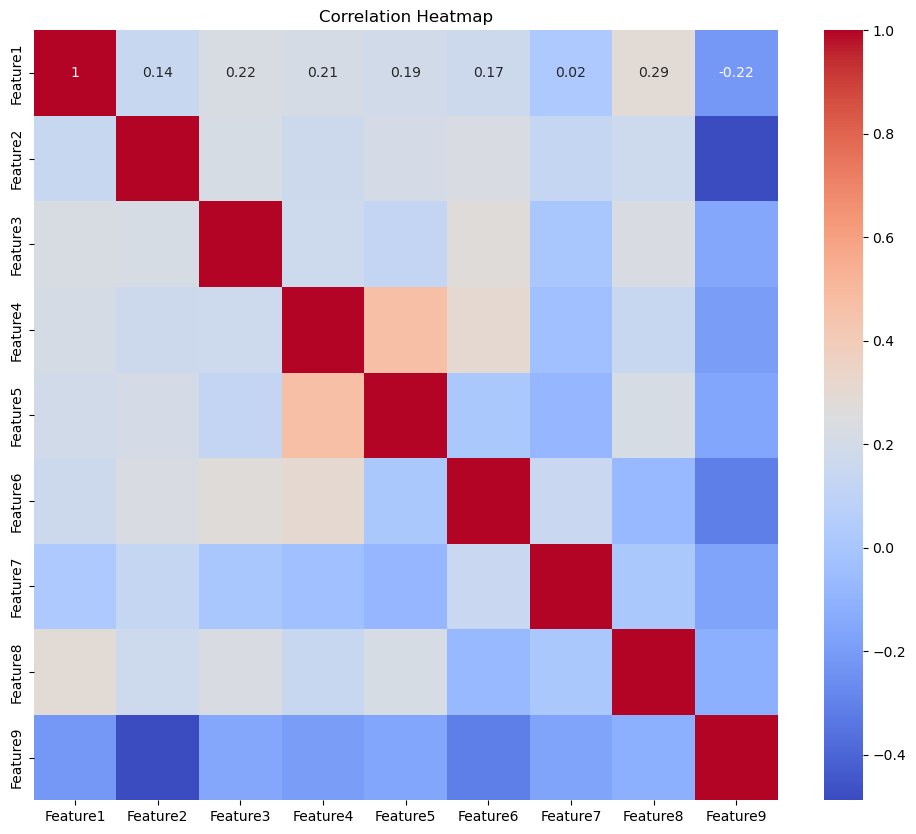

In [26]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

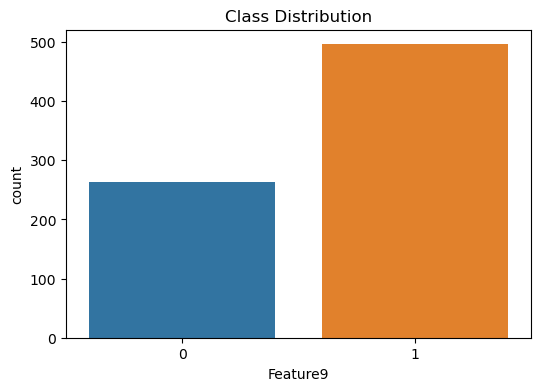

In [182]:
# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=data.iloc[:, -1])
plt.title('Class Distribution')
plt.show()

In [241]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Feature1    0
Feature2    0
Feature3    0
Feature4    0
Feature5    0
Feature6    0
Feature7    0
Feature8    0
Feature9    0
dtype: int64


Step 3. Split into 70% train 30% test

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Display the shape of the resulting datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((531, 8), (228, 8), (531,), (228,))

Step 4. Modify the model to take the new data

In [280]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

/Users/monicalokare/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

Step 5. Train the model on the data

In [282]:
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    batch_size=32, 
                    validation_split=0.2, 
                    verbose=1)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5641 - loss: 0.6803 - val_accuracy: 0.7103 - val_loss: 0.6384
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6311 - loss: 0.6422 - val_accuracy: 0.7009 - val_loss: 0.6033
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6586 - loss: 0.6028 - val_accuracy: 0.7009 - val_loss: 0.5794
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6495 - loss: 0.5935 - val_accuracy: 0.7103 - val_loss: 0.5609
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6981 - loss: 0.5771 - val_accuracy: 0.7290 - val_loss: 0.5459
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7259 - loss: 0.5453 - val_accuracy: 0.7944 - val_loss: 0.5336
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7161 - loss: 0.5614 - val_accuracy: 0.7944 - val_loss: 0.5222
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7197 - loss: 0.5227 - val_accuracy: 0.8037 - val_loss

Step 6. Make predictions on the test data and compare them to the test labels

In [284]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
print("\nFirst 10 actual values:")
print(y_test[:10])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

First 10 actual values:
[1 1 1 1 0 1 0 0 1 0]


Step 7. Calculate the accuracy of your results

In [286]:
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred_classes))

Accuracy: 0.7368
              precision    recall  f1-score   support

           0       0.62      0.58      0.60        78
           1       0.79      0.82      0.80       150

    accuracy                           0.74       228
   macro avg       0.71      0.70      0.70       228
weighted avg       0.73      0.74      0.73       228



Comparing predicted and actual

In [288]:
print("Predictions: ", y_pred_classes[:10].flatten())  # First 10 predictions
print("Actual:      ", y_test[:10]) 

Predictions:  [1 1 1 1 1 1 1 1 1 0]
Actual:       [1 1 1 1 0 1 0 0 1 0]


Step 8. Hypothesize changes you can make to the model. Type out your hypothesis as comments in the code or in a text cell. (ex. doubling the width/depth of your NN, experiment thoroughly)

# Hypothesis: Increasing the model complexity by adding more layers and neurons might improve the model's performance.

Step 9. Test your hypothesis by training your new models

Hypothesis1: Doubling the number of neurons in each hidden layer increases the model's ability to learn complex patterns in the data and will potentially improve the performance. This can also lead to overfitting if the model becomes too large for the dataset.

In [290]:
complex_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Doubling width here
    tf.keras.layers.Dense(32, activation='relu'),  # Doubling width here
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

complex_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

history_complex = complex_model.fit(X_train, y_train, 
                                    epochs=30, 
                                    batch_size=32, 
                                    validation_split=0.2, 
                                    verbose=1)

Epoch 1/30


/Users/monicalokare/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6054 - loss: 0.6531 - val_accuracy: 0.6916 - val_loss: 0.5973
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6725 - loss: 0.5912 - val_accuracy: 0.6916 - val_loss: 0.5683
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6303 - loss: 0.5915 - val_accuracy: 0.7196 - val_loss: 0.5467
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6576 - loss: 0.5601 - val_accuracy: 0.7850 - val_loss: 0.5261
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7048 - loss: 0.5377 - val_accuracy: 0.7850 - val_loss: 0.5080
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7384 - loss: 0.5200 - val_accuracy: 0.7944 - val_loss: 0.4929
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7865 - loss: 0.4769 - val_accuracy: 0.7850 - val_loss: 0.4819
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7695 - loss: 0.4809 - val_accuracy: 0.7850 - val_loss: 0.4756
E

Step 10. Show the results of your changed models by repeating steps 6 and 7. Discuss the differences and explain why.

In [318]:
# Step 10: Make predictions on the test data
y_pred_width = complex_model.predict(X_test)
y_pred_width_classes = (y_pred_complex > 0.5).astype(int)

# Calculate the accuracy of the new model
width_accuracy = accuracy_score(y_test, y_pred_width_classes)
print(f"Width increase complex model Accuracy: {width_accuracy:.4f}")

# Show classification report for the complex model
print(classification_report(y_test, y_pred_width_classes))

# Compare predictions with actual labels (first 10 samples)
print("Width increase complex model predictions: ", y_pred_width_classes[:10].flatten())
print("Actual Labels: ", y_test[:10])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Width increase complex model Accuracy: 0.7588
              precision    recall  f1-score   support

           0       0.65      0.63      0.64        78
           1       0.81      0.83      0.82       150

    accuracy                           0.76       228
   macro avg       0.73      0.73      0.73       228
weighted avg       0.76      0.76      0.76       228

Width increase complex model predictions:  [1 1 1 1 1 1 1 1 1 0]
Actual Labels:  [1 1 1 1 0 1 0 0 1 0]


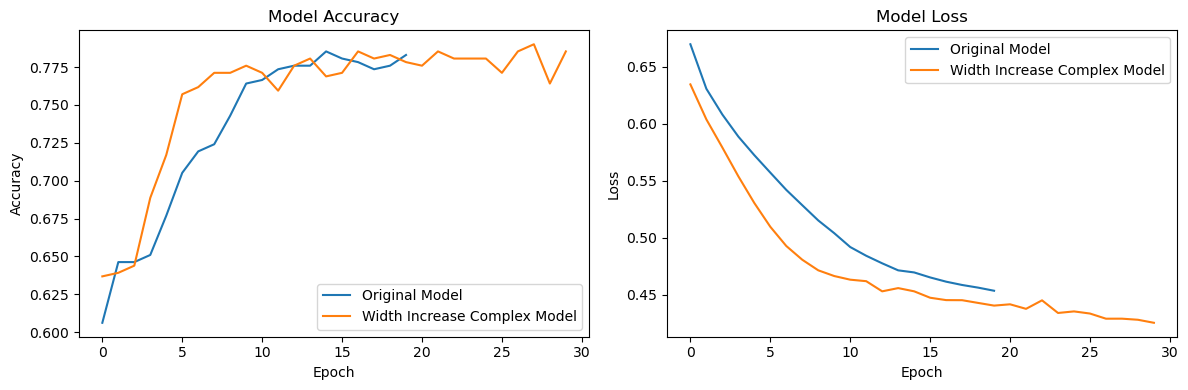

In [310]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Original Model')
plt.plot(history_complex.history['accuracy'], label='Width Increase Complex Model')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Original Model')
plt.plot(history_complex.history['loss'], label='Width Increase Complex Model')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Hypothesis2: Doubling the number of neurons in each hidden layer increases the model's ability to learn complex patterns in the data and will potentially improving the performance. Adding more layers to the model (increasing the depth) will help model to learn more hierarchical and complex features. This may also make the model harder to train and could lead to vanishing gradients if the network becomes too deep.

In [312]:
#Test your hypothesis by training your new models
complex_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Doubling width/neurons here
    tf.keras.layers.Dense(32, activation='relu'),  # Doubling width/neurons here
    tf.keras.layers.Dense(16, activation='relu'),  # Added layer for increased depth
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

complex_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

history_complex = complex_model.fit(X_train, y_train, 
                                    epochs=40, 
                                    batch_size=32, 
                                    validation_split=0.2, 
                                    verbose=1)

Epoch 1/40


/Users/monicalokare/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4200 - loss: 0.7228 - val_accuracy: 0.6916 - val_loss: 0.6614
Epoch 2/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6454 - loss: 0.6578 - val_accuracy: 0.6916 - val_loss: 0.6199
Epoch 3/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6476 - loss: 0.6223 - val_accuracy: 0.6916 - val_loss: 0.5841
Epoch 4/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6394 - loss: 0.6091 - val_accuracy: 0.7757 - val_loss: 0.5503
Epoch 5/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7551 - loss: 0.5440 - val_accuracy: 0.7383 - val_loss: 0.5206
Epoch 6/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7375 - loss: 0.5264 - val_accuracy: 0.7757 - val_loss: 0.4920
Epoch 7/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7589 - loss: 0.4801 - val_accuracy: 0.7383 - val_loss: 0.4809
Epoch 8/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7635 - loss: 0.4723 - val_accuracy: 0.7290 - val_loss: 0.4736
Ep

In [314]:
# Step 10: Make predictions on the test data
y_pred_depth = complex_model.predict(X_test)
y_pred_depth_classes = (y_pred_complex > 0.5).astype(int)

# Calculate the accuracy of the new model
depth_accuracy = accuracy_score(y_test, y_pred_depth_classes)
print(f"Depth Increase Complex Model Accuracy: {depth_accuracy:.4f}")

# Show classification report for the complex model
print(classification_report(y_test, y_pred_depth_classes))

# Compare predictions with actual labels (first 10 samples)
print("Depth Increase Complex Model Predictions: ", y_pred_depth_classes[:10].flatten())
print("Actual Labels: ", y_test[:10])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Depth Increase Complex Model Accuracy: 0.7588
              precision    recall  f1-score   support

           0       0.65      0.63      0.64        78
           1       0.81      0.83      0.82       150

    accuracy                           0.76       228
   macro avg       0.73      0.73      0.73       228
weighted avg       0.76      0.76      0.76       228

Depth Increase Complex Model Predictions:  [1 1 1 1 1 1 1 1 1 0]
Actual Labels:  [1 1 1 1 0 1 0 0 1 0]


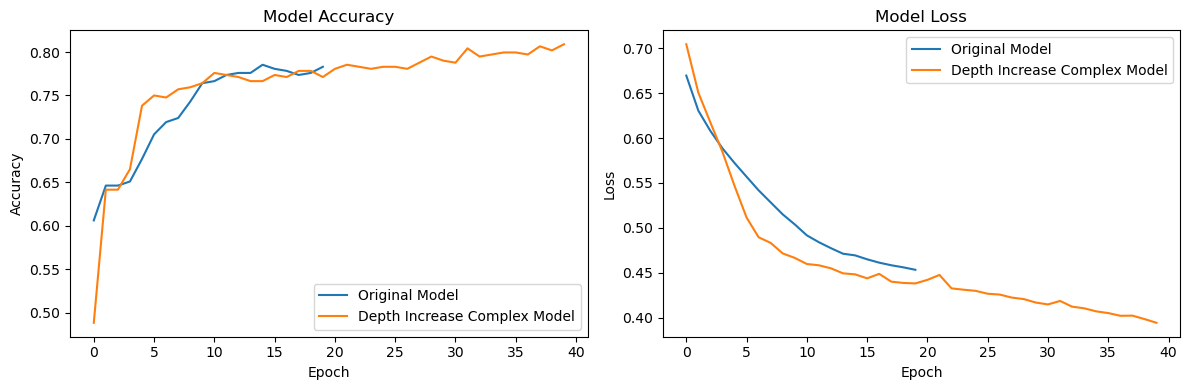

In [316]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Original Model')
plt.plot(history_complex.history['accuracy'], label='Depth Increase Complex Model')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Original Model')
plt.plot(history_complex.history['loss'], label='Depth Increase Complex Model')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Discussion of the results:
- Both the width-increase and depth-increase of complex models shows a small improvement in accuracy and F1-scores over the original model. This indicates that the increase in either the width/depth of the neural network can led to better performance in identifying both positive (class 1) and negative (class 0) cases.The accuracy improved slightly from 0.7368 to 0.7588, and F1-scores for both classes saw minor gains.
- The precision, recall, and F1-score for class 0 (the minority class) has also improved little in the complex models. This indicates that they were better at detecting negative cases compared to the original model.
- The accuracy curves for both the complex models (width and depth) converge faster and reach a higher accuracy earlier compared to the original model.The loss curves indicates both complex models reduce the loss faster and maintain lower loss values over time, indicating better optimization and possibly better fitting to the data.

## B. PyTorch

Step 1. Import the data from the given .csv file (diabetes.csv Download diabetes.csv). The first few columns contain the data while the last column is a binary class label of 0 or 1

In [528]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from torch.utils.data import DataLoader, TensorDataset

In [530]:
# Load the data
data = pd.read_csv('diabetes.csv')
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

### Step 2 is same for TensorFlow and PyTorch
Step 2. Preprocess the data as you see fit and show basic data visualization for better understanding of data

In [533]:
# Basic statistics
print(data.describe())

         Feature1    Feature2    Feature3    Feature4    Feature5    Feature6  \
count  759.000000  759.000000  759.000000  759.000000  759.000000  759.000000   
mean    -0.407657    0.218563    0.176505   -0.289735   -0.323534   -0.032245   
std      0.386260    0.306419    0.201287    0.258480    0.375544    0.205376   
min     -0.882353   -0.557789   -0.606557   -0.858586   -0.966903   -0.457526   
25%     -0.764706   -0.005025    0.016393   -0.494949   -0.716312   -0.178837   
50%     -0.529412    0.165829    0.180328   -0.292929    0.000000   -0.034277   
75%      0.000000    0.407035    0.311475    0.000000    0.000000    0.087929   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         Feature7    Feature8    Feature9  
count  759.000000  759.000000  759.000000  
mean    -0.663253   -0.516162    0.653491  
std      0.283056    0.400794    0.476171  
min     -0.994876   -0.966667    0.000000  
25%     -0.858241   -0.866667    0.000000  
50%   

Step 3. Split into 70% train 30% test

In [622]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Converting to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Binary labels in column format
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)
# Creating a TensorDataset from training data
train_dataset = TensorDataset(X_train, y_train)

Step 4. Modify the model shown in the demo to take the new data

In [625]:
# Defining the model
class BinaryClassificationModel(nn.Module):
    def __init__(self, input_dim):
        super(BinaryClassificationModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, 32)
        self.layer2 = nn.Linear(32, 16)
        self.output_layer = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.output_layer(x))
        return x


input_dim = X_train.shape[1]
model = BinaryClassificationModel(input_dim)

# Defining the loss and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

Step 5. Train the model on the data

In [628]:
# Using DataLoader to create batches and also shuffle the data
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

# Define the number of epochs
epochs = 20

# Track history for the original model for plots
original_model_history = {
    'accuracy': [],
    'loss': []
}

# Training loop with DataLoader, batch size = 32 and epochs = 20
for epoch in range(epochs):
    model.train()  # Set the model to training mode

    train_loss = 0.0
    correct_predictions = 0

    for batch_x, batch_y in train_loader:  # Iterate over the DataLoader
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        train_loss += loss.item()
        
        # Calculate accuracy
        predicted_classes = (outputs > 0.5).float()
        correct_predictions += (predicted_classes == batch_y).sum().item()

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    # Calculate and print accuracy for each epoch
    epoch_accuracy = correct_predictions / len(X_train)
    epoch_loss = train_loss / len(X_train)
    original_model_history['accuracy'].append(epoch_accuracy)
    original_model_history['loss'].append(epoch_loss)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

Epoch 1/20, Loss: 0.0219, Accuracy: 0.6139
Epoch 2/20, Loss: 0.0211, Accuracy: 0.6516
Epoch 3/20, Loss: 0.0205, Accuracy: 0.6516
Epoch 4/20, Loss: 0.0198, Accuracy: 0.6516
Epoch 5/20, Loss: 0.0192, Accuracy: 0.6516
Epoch 6/20, Loss: 0.0184, Accuracy: 0.6780
Epoch 7/20, Loss: 0.0177, Accuracy: 0.7119
Epoch 8/20, Loss: 0.0170, Accuracy: 0.7420
Epoch 9/20, Loss: 0.0164, Accuracy: 0.7665
Epoch 10/20, Loss: 0.0158, Accuracy: 0.7684
Epoch 11/20, Loss: 0.0154, Accuracy: 0.7778
Epoch 12/20, Loss: 0.0151, Accuracy: 0.7797
Epoch 13/20, Loss: 0.0149, Accuracy: 0.7834
Epoch 14/20, Loss: 0.0148, Accuracy: 0.7834
Epoch 15/20, Loss: 0.0147, Accuracy: 0.7853
Epoch 16/20, Loss: 0.0146, Accuracy: 0.7815
Epoch 17/20, Loss: 0.0146, Accuracy: 0.7834
Epoch 18/20, Loss: 0.0145, Accuracy: 0.7834
Epoch 19/20, Loss: 0.0145, Accuracy: 0.7834
Epoch 20/20, Loss: 0.0145, Accuracy: 0.7834


Step 6. Make predictions on the test data and compare them to the test labels

In [631]:
# Evaluate the model on the test set
model.eval()  
with torch.no_grad():
    y_pred = model(X_test)
    y_pred_classes = (y_pred > 0.5).float()  # Convert logits to binary predictions

Step 7. Calculate the accuracy of your results

In [634]:
# Convert tensors to numpy for accuracy calculations
y_pred_classes_np = y_pred_classes.numpy()
y_test_np = y_test.numpy()

# Calculate accuracy
accuracy = accuracy_score(y_test_np, y_pred_classes_np)
print(f"Accuracy: {accuracy:.4f}")

# Print the classification report
print(classification_report(y_test_np, y_pred_classes_np))

Accuracy: 0.7368
              precision    recall  f1-score   support

         0.0       0.62      0.59      0.61        78
         1.0       0.79      0.81      0.80       150

    accuracy                           0.74       228
   macro avg       0.71      0.70      0.70       228
weighted avg       0.73      0.74      0.74       228



# Hypothesis: Increasing the model complexity by adding more layers and neurons might improve the model's performance.

Step 8. Hypothesize changes you can make to the model. Type out your hypothesis as comments in the code or in a text cell. (ex. doubling the width/depth of your NN, experiment thoroughly)

Hypothesis1: Doubling the number of neurons in each hidden layer increases the model's ability to learn complex patterns in the data and will potentially improve the performance. This can also lead to overfitting if the model becomes too large for the dataset.

In [638]:
# Define the more complex model with doubled width
class ComplexModel(nn.Module):
    def __init__(self, input_dim):
        super(ComplexModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)  # Doubling the width
        self.layer2 = nn.Linear(64, 32)  # Doubling the width
        self.output_layer = nn.Linear(32, 1)
        self.relu = nn.ReLU() 
        self.sigmoid = nn.Sigmoid()
      
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.sigmoid(self.output_layer(x))
        return x


input_dim = X_train.shape[1]
complex_model = ComplexModel(input_dim)
criterion = nn.BCELoss()  # Binary Cross Entropy loss
optimizer = optim.Adam(complex_model.parameters(), lr=0.001)

# Train the complex model
epochs = 30
batch_size = 32

complex_model_history = {
    'accuracy': [],
    'loss': []
}

for epoch in range(epochs):
    complex_model.train()  
    permutation = torch.randperm(X_train.size()[0])

    train_loss = 0.0
    correct_predictions = 0

    for i in range(0, X_train.size()[0], batch_size):
        indices = permutation[i:i + batch_size]
        batch_x, batch_y = X_train[indices], y_train[indices]
        optimizer.zero_grad()
        outputs = complex_model(batch_x)
        loss = criterion(outputs, batch_y)
        train_loss += loss.item()
        
        # Calculate accuracy
        predicted_classes = (outputs > 0.5).float()
        correct_predictions += (predicted_classes == batch_y).sum().item()

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    # Save history of accuracy and loss for the complex model
    epoch_accuracy = correct_predictions / len(X_train)
    epoch_loss = train_loss / len(X_train)
    complex_model_history['accuracy'].append(epoch_accuracy)
    complex_model_history['loss'].append(epoch_loss)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

Epoch 1/30, Loss: 0.0210, Accuracy: 0.6516
Epoch 2/30, Loss: 0.0200, Accuracy: 0.6516
Epoch 3/30, Loss: 0.0191, Accuracy: 0.6497
Epoch 4/30, Loss: 0.0181, Accuracy: 0.6798
Epoch 5/30, Loss: 0.0168, Accuracy: 0.7326
Epoch 6/30, Loss: 0.0159, Accuracy: 0.7589
Epoch 7/30, Loss: 0.0152, Accuracy: 0.7702
Epoch 8/30, Loss: 0.0149, Accuracy: 0.7684
Epoch 9/30, Loss: 0.0147, Accuracy: 0.7740
Epoch 10/30, Loss: 0.0148, Accuracy: 0.7759
Epoch 11/30, Loss: 0.0147, Accuracy: 0.7740
Epoch 12/30, Loss: 0.0146, Accuracy: 0.7740
Epoch 13/30, Loss: 0.0146, Accuracy: 0.7872
Epoch 14/30, Loss: 0.0146, Accuracy: 0.7646
Epoch 15/30, Loss: 0.0146, Accuracy: 0.7778
Epoch 16/30, Loss: 0.0142, Accuracy: 0.7702
Epoch 17/30, Loss: 0.0145, Accuracy: 0.7797
Epoch 18/30, Loss: 0.0143, Accuracy: 0.7646
Epoch 19/30, Loss: 0.0144, Accuracy: 0.7797
Epoch 20/30, Loss: 0.0140, Accuracy: 0.7778
Epoch 21/30, Loss: 0.0141, Accuracy: 0.7778
Epoch 22/30, Loss: 0.0141, Accuracy: 0.7759
Epoch 23/30, Loss: 0.0139, Accuracy: 0.77

In [640]:
# Evaluate the complex model on the test set
complex_model.eval() 
with torch.no_grad():
    y_pred_complex = complex_model(X_test)
    y_pred_complex_classes = (y_pred_complex > 0.5).float()

# Convert tensors to numpy arrays for sklearn accuracy and report
y_pred_complex_np = y_pred_complex_classes.numpy()
y_test_np = y_test.numpy()

# Calculate accuracy
complex_model_accuracy = accuracy_score(y_test_np, y_pred_complex_np)
print(f"Width increase complex model Accuracy: {complex_model_accuracy:.4f}")

# Print classification report
print(classification_report(y_test_np, y_pred_complex_np))

# Compare predictions with actual labels (first 10 samples)
print("Width increase complex model predictions: ", y_pred_complex_np[:10].flatten())
print("Actual Labels: ", y_test_np[:10].flatten())


Width increase complex model Accuracy: 0.7544
              precision    recall  f1-score   support

         0.0       0.65      0.62      0.63        78
         1.0       0.81      0.83      0.82       150

    accuracy                           0.75       228
   macro avg       0.73      0.72      0.72       228
weighted avg       0.75      0.75      0.75       228

Width increase complex model predictions:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
Actual Labels:  [1. 1. 1. 1. 0. 1. 0. 0. 1. 0.]


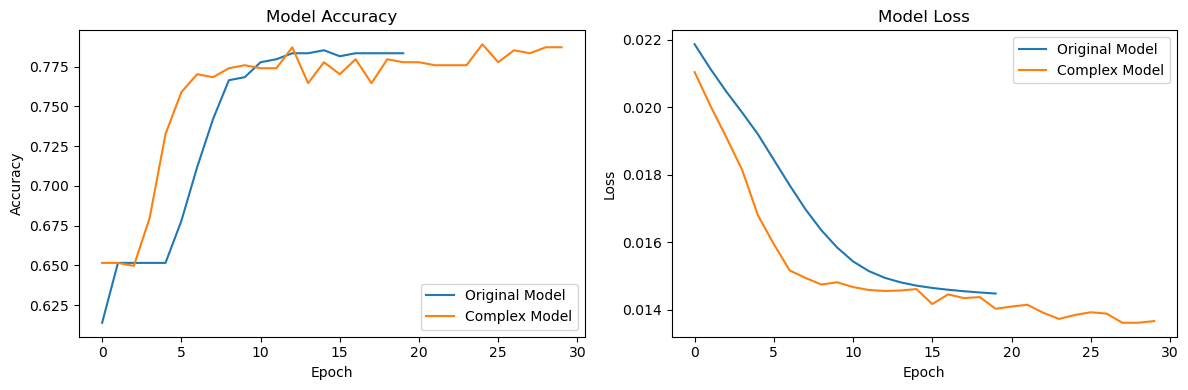

In [642]:
# Plot training history for both the original and complex models
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(original_model_history['accuracy'], label='Original Model')
plt.plot(complex_model_history['accuracy'], label='Complex Model')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(original_model_history['loss'], label='Original Model')
plt.plot(complex_model_history['loss'], label='Complex Model')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Hypothesis2: Doubling the number of neurons in each hidden layer increases the model's ability to learn complex patterns in the data and will potentially improve the performance. Adding more layers to the model (increasing the depth) will also help model to learn more hierarchical and complex features. This may also make the model harder to train and could lead to vanishing gradients if the network becomes too deep.

In [654]:
# Define the deeper model with doubled width and increased depth
class DeepComplexModel(nn.Module):
    def __init__(self, input_dim):
        super(DeepComplexModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)  # Doubling the width
        self.layer2 = nn.Linear(64, 32)  # Doubling the width
        self.layer3 = nn.Linear(32, 32)  # Added another layer for depth
        self.layer4 = nn.Linear(32, 16)  # Another layer for more depth
        self.output_layer = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))  # Deeper layers
        x = self.relu(self.layer4(x))  # Deeper layers
        x = self.sigmoid(self.output_layer(x))
        return x


deep_complex_model = DeepComplexModel(input_dim)
criterion = nn.BCELoss()  # Binary Cross Entropy loss
optimizer = optim.Adam(deep_complex_model.parameters(), lr=0.001)

# Train the deeper complex model
epochs = 30
batch_size = 32

deep_complex_model_history = {
    'accuracy': [],
    'loss': []
}

for epoch in range(epochs):
    deep_complex_model.train() 
    train_loss = 0.0
    correct_predictions = 0

    for batch_x, batch_y in train_loader:  # Iterate over batches from DataLoader
        optimizer.zero_grad()
        outputs = deep_complex_model(batch_x)
        loss = criterion(outputs, batch_y)
        train_loss += loss.item()
        
        # Calculate accuracy
        predicted_classes = (outputs > 0.5).float()
        correct_predictions += (predicted_classes == batch_y).sum().item()

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    # Save history of accuracy and loss for the deep complex model
    epoch_accuracy = correct_predictions / len(X_train)
    epoch_loss = train_loss / len(X_train)
    deep_complex_model_history['accuracy'].append(epoch_accuracy)
    deep_complex_model_history['loss'].append(epoch_loss)

    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

Epoch 1/30, Loss: 0.0211, Accuracy: 0.6516
Epoch 2/30, Loss: 0.0206, Accuracy: 0.6516
Epoch 3/30, Loss: 0.0198, Accuracy: 0.6516
Epoch 4/30, Loss: 0.0185, Accuracy: 0.6516
Epoch 5/30, Loss: 0.0169, Accuracy: 0.7420
Epoch 6/30, Loss: 0.0158, Accuracy: 0.7665
Epoch 7/30, Loss: 0.0152, Accuracy: 0.7702
Epoch 8/30, Loss: 0.0150, Accuracy: 0.7759
Epoch 9/30, Loss: 0.0148, Accuracy: 0.7797
Epoch 10/30, Loss: 0.0146, Accuracy: 0.7815
Epoch 11/30, Loss: 0.0145, Accuracy: 0.7815
Epoch 12/30, Loss: 0.0144, Accuracy: 0.7834
Epoch 13/30, Loss: 0.0143, Accuracy: 0.7834
Epoch 14/30, Loss: 0.0142, Accuracy: 0.7834
Epoch 15/30, Loss: 0.0141, Accuracy: 0.7834
Epoch 16/30, Loss: 0.0140, Accuracy: 0.7815
Epoch 17/30, Loss: 0.0139, Accuracy: 0.7853
Epoch 18/30, Loss: 0.0138, Accuracy: 0.7910
Epoch 19/30, Loss: 0.0137, Accuracy: 0.7910
Epoch 20/30, Loss: 0.0136, Accuracy: 0.7928
Epoch 21/30, Loss: 0.0135, Accuracy: 0.7872
Epoch 22/30, Loss: 0.0134, Accuracy: 0.7910
Epoch 23/30, Loss: 0.0132, Accuracy: 0.80

In [656]:
# Evaluate the deep complex model on the test set
deep_complex_model.eval()
with torch.no_grad():
    y_pred_deep_complex = deep_complex_model(X_test)
    y_pred_deep_complex_classes = (y_pred_deep_complex > 0.5).float()

# Convert tensors to numpy arrays for sklearn accuracy and report
y_pred_deep_complex_np = y_pred_deep_complex_classes.numpy()

# Calculate accuracy
deep_complex_model_accuracy = accuracy_score(y_test_np, y_pred_deep_complex_np)
print(f"Depth increase complex model Accuracy: {deep_complex_model_accuracy:.4f}")

# Print classification report
print(classification_report(y_test_np, y_pred_deep_complex_np))

# Compare predictions with actual labels (first 10 samples)
print("Depth increase complex model predictions: ", y_pred_deep_complex_np[:10].flatten())
print("Actual Labels: ", y_test_np[:10].flatten())

Depth increase complex model Accuracy: 0.7675
              precision    recall  f1-score   support

         0.0       0.63      0.76      0.69        78
         1.0       0.86      0.77      0.81       150

    accuracy                           0.77       228
   macro avg       0.75      0.76      0.75       228
weighted avg       0.78      0.77      0.77       228

Depth increase complex model predictions:  [1. 1. 1. 1. 0. 1. 0. 1. 1. 0.]
Actual Labels:  [1. 1. 1. 1. 0. 1. 0. 0. 1. 0.]


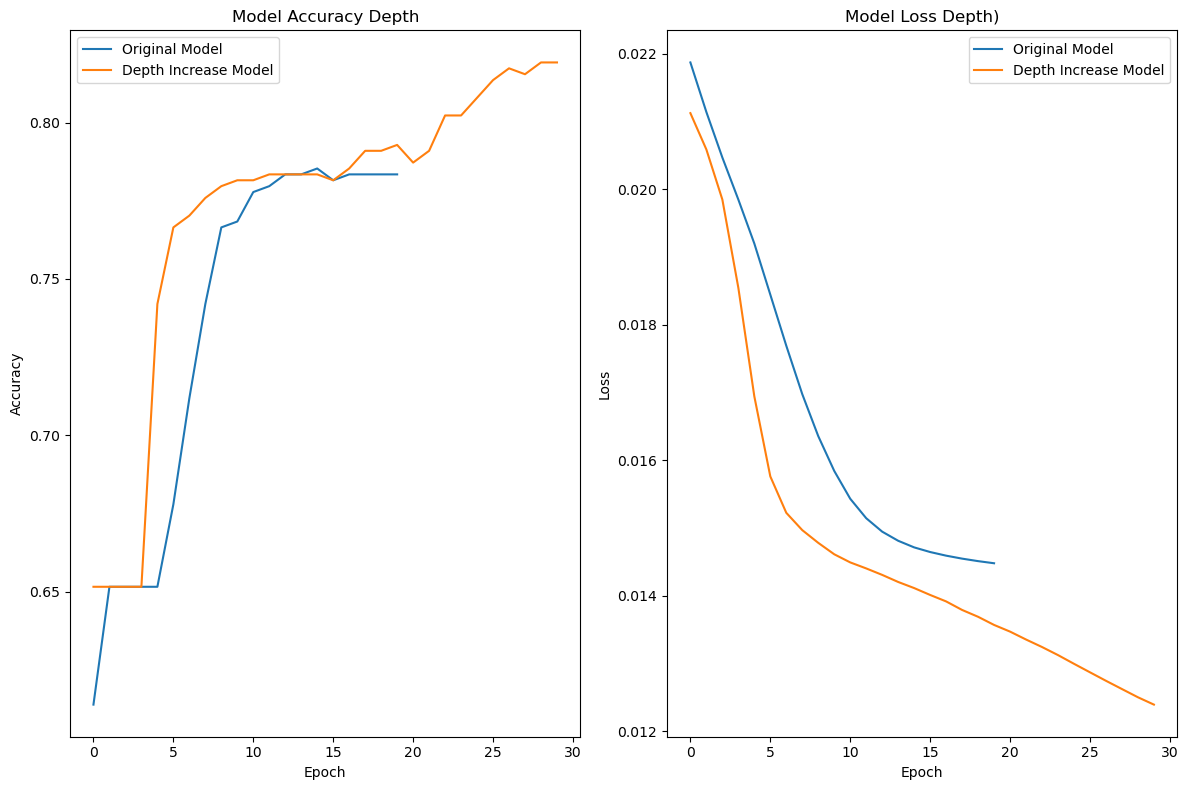

In [664]:
# Plot training history to differentiate between depth and original models
plt.figure(figsize=(12, 8))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(original_model_history['accuracy'], label='Original Model')
plt.plot(deep_complex_model_history['accuracy'], label='Depth Increase Model')
plt.title('Model Accuracy Depth')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(original_model_history['loss'], label='Original Model')
plt.plot(deep_complex_model_history['loss'], label='Depth Increase Model')
plt.title('Model Loss Depth)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

- Both width and depth increased models performs better than original model in terms of accuracy. The depth increased model has the highest accuracy at 76.75%, followed by the width-increased model at 75.44%, and finally the original model at 73.68%.There is an improvement in accuracy this indicates that the complex models are able to capture the underlying patterns in the data. Hence, adding neurons and layer helps model to learn complex features which leads to better generalization.
- In original model the improvement is slow and steady but plateaus early. In width increased model there is faster learning initially but just like original there is early plateau because of overfitting. In depth increased model there is steady learning and has least overfitting. It continues to improve and adding more layers allows the model to capture more complex feature.
- For more depth model in class 0, there is improvements in recall from 59% to 76% which means it's able to identify the class 0 data. Width increased model for class 0 shows improvement but to a lesser extent
- For width and depth increase for class 1, the precision and recall are better in width. Also, depth increased model is better than original model.The depth increased model has a higher precision for class 1 i.e. 86% vs. 81% in the width-increased model.
- F-1 score is also highest in depth increased model for class0 and class1 which tells that it is able to generalize better than both the original and width increased models.

Thank You !!